In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import networkx as nx
from scipy.stats import rankdata, norm
from scipy.stats import rankdata

In [10]:
def spearman_rank_correlation(x, y):
    rank_x = rankdata(x)
    rank_y = rankdata(y)
    d = rank_x - rank_y
    
    # Calculating Spearman's rank correlation coefficient
    n = len(x)
    rho = 1 - (6 * np.sum(d**2)) / (n * (n**2 - 1))
    return rho


In [11]:
from scipy.stats import t

def hypothesis_test_spearman(x, y):
    rho = spearman_rank_correlation(x, y)
    n = len(x)
    t_statistic = rho * np.sqrt((n - 2) / (1 - rho**2))
    # Two-tailed test
    p_value = 2 * (1 - t.cdf(np.abs(t_statistic), df=n-2))
    return t_statistic, p_value

In [12]:
def fisher_transformation(rho):
    return 0.5 * np.log((1 + rho) / (1 - rho))

def compare_correlations(rho_A, n_A, rho_B, n_B):
    rho_A_prime = fisher_transformation(rho_A)
    rho_B_prime = fisher_transformation(rho_B)
    z = (rho_A_prime - rho_B_prime) / np.sqrt((1/(n_A - 3)) + (1/(n_B - 3)))
    p_value = 2 * (1 - norm.cdf(np.abs(z)))
    return z, p_value

In [29]:
def generate_graphs(n, p, k):
    return [nx.erdos_renyi_graph(n, p) for _ in range(k)]

def spectral_radius(graph):
    eigenvalues = np.linalg.eigvals(nx.adjacency_matrix(graph).todense())
    return np.max(np.abs(eigenvalues))

In [33]:
# 1. Generating Random Graphs
n = 100  # Number of nodes in each graph
p = 0.13  # Probability of edge creation
k = 3000  # Number of graphs




graphs_A = generate_graphs(n, p, k)
graphs_B = generate_graphs(n, p, k)
# 2. Calculating Spectral Radii
radii_A = [spectral_radius(graph) for graph in graphs_A]
radii_B = [spectral_radius(graph) for graph in graphs_B]
# 3. Applying the Proposed Method
# Spearman's Rank Correlation
rho_A = spearman_rank_correlation(radii_A, radii_B)
rho_B = spearman_rank_correlation(radii_B, radii_A)
# Hypothesis Test for Spearman's Correlation
t_statistic_A, p_value_A = hypothesis_test_spearman(radii_A, radii_B)
t_statistic_B, p_value_B = hypothesis_test_spearman(radii_B, radii_A)
# Comparing Correlations Between Two Conditions
z, p_value_comparison = compare_correlations(rho_A, k, rho_B, k)

Spearman's Rank Correlation A: 0.042320373591152594
Spearman's Rank Correlation B: 0.042320373591152594
Hypothesis Test A: t-statistic = 2.319287405117585 , p-value = 0.020446342810840124
Hypothesis Test B: t-statistic = 2.319287405117585 , p-value = 0.020446342810840124
Comparison of Correlations: z = 0.0 , p-value = 1.0


In [ ]:
print("Spearman's Rank Correlation A:", rho_A)
print("Spearman's Rank Correlation B:", rho_B)
print("Hypothesis Test A: t-statistic =", t_statistic_A, ", p-value =", p_value_A)
print("Hypothesis Test B: t-statistic =", t_statistic_B, ", p-value =", p_value_B)
print("Comparison of Correlations: z =", z, ", p-value =", p_value_comparison)

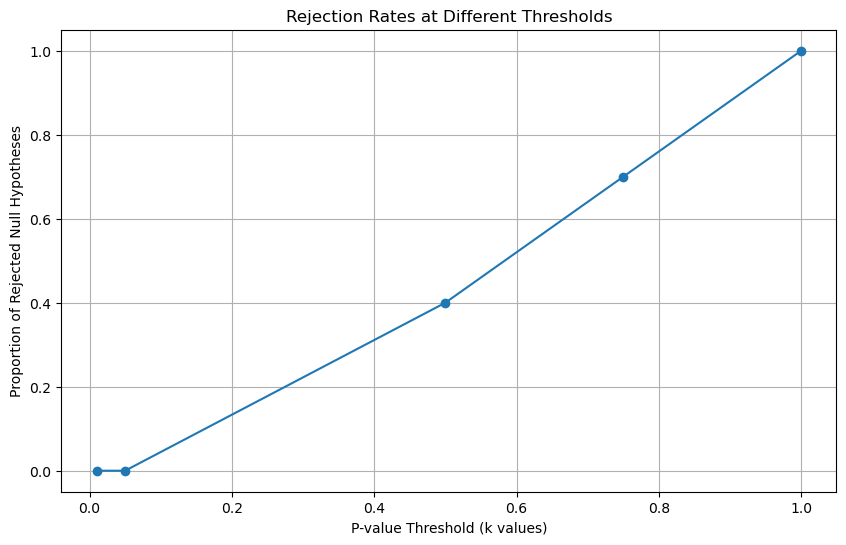

In [28]:
def single_simulation(n, p, k):
    graphs_set_1 = generate_graphs(n, p, k)
    graphs_set_2 = generate_graphs(n, p, k)
    radii_set_1 = [spectral_radius(graph) for graph in graphs_set_1]
    radii_set_2 = [spectral_radius(graph) for graph in graphs_set_2]
    _, p_value = hypothesis_test_spearman(radii_set_1, radii_set_2)
    return p_value

def simulate_and_test(num_reps, thresholds, n, p):
    p_values = [single_simulation(n, p, k) for _ in range(num_reps)]
    rejection_rates = {threshold: np.mean(np.array(p_values) <= threshold) for threshold in thresholds}
    return rejection_rates

def plot_rejection_rates(rejection_rates):
    plt.figure(figsize=(10, 6))
    thresholds, rates = zip(*sorted(rejection_rates.items()))
    plt.plot(thresholds, rates, marker='o')
    plt.xlabel('P-value Threshold (k values)')
    plt.ylabel('Proportion of Rejected Null Hypotheses')
    plt.title('Rejection Rates at Different Thresholds')
    plt.grid(True)
    plt.show()

####################

num_reps = 20
thresholds = [0.01, 0.05, 0.5, 0.75, 1]  # You can set these as per your requirement
n = 50
p = 0.1

rejection_rates = simulate_and_test(num_reps, thresholds, n, p)
plot_rejection_rates(rejection_rates)